<a href="https://colab.research.google.com/github/juancarlosmontesdeoca/descriptive-statistics-exercises-project-with-python/blob/main/Proyecto_Estadist_Descrit_JuanCarlos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [35]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode
import seaborn as sns

# Cargar dataset de IMDb
url = "https://raw.githubusercontent.com/4GeeksAcademy/descriptive-statistics-exercises-project-with-python/refs/heads/main/assets/imdb_1000.csv"
df = pd.read_csv(url)
df.head(5)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [36]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df['title_length'] = df['title'].apply(len)
df.head(5)


,star_rating,title,content_rating,genre,duration,actors_list,title_length
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",24
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",13
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",22
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",15
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",12


In [37]:
# Calcula media, mediana y moda de la columna 'title_length'
media = df['title_length'].mean()
mediana = df['title_length'].median()
moda = df['title_length'].mode()
print(f"Media: {media:.2f}\nMediana: {mediana}\nModa: {moda}")

Media: 15.48
Mediana: 14.0
Moda: 0    12
Name: title_length, dtype: int64


Una observación importante que encontramos es que la media y la mediana (percentil 50) son diferentes, por lo tanto nos da una idea que la columna "title_length" no sigue una distribución normal.

In [38]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'
rango = df['title_length'].max() - df['title_length'].min()
varianza = round( df['title_length'].var(ddof=1), 4) #aplico varianza muestral dado que me hablan de una base con 1000 películas populares del sitio IMDb.
desviacion_estandar = round(df['title_length'].std(), 4)
print(f"Rango: {rango}\nVarianza: {varianza:.2f}\nDesviación_Standar: {desviacion_estandar}")

Rango: 67
Varianza: 72.11
Desviación_Standar: 8.4916


In [39]:
#Para conocer la cantidad de veces que se repite el numero 12, obtenido como moda, podemos correr la siguiente instruccion

In [40]:
frecuencia_moda = df['title_length'].value_counts().loc[12]
print(f'La moda: {moda} se repite en la columna title_length: {frecuencia_moda} veces')

La moda: 0    12
Name: title_length, dtype: int64 se repite en la columna title_length: 64 veces


Si nos interesará conocer, si es el 12 es la única moda podemos correr la siguiente intruccion:

In [41]:
modas = df['title_length'].mode()
for v in modas:
    freq = df['title_length'].value_counts().loc[v]
    print(f'Valor {v} se repite {freq} veces')


Valor 12 se repite 64 veces


Con esa salida podemos concluir que no hay más de una moda

In [42]:
# Calcula asimetría y curtosis de la columna 'title_length'
asimetria = df['title_length'].skew().round(4)
curtosis = df['title_length'].kurtosis().round(4)
print(f"Asimetría: {asimetria}\nCurtosis: {curtosis}")


Asimetría: 1.5253
Curtosis: 3.8123


La Kurtosis es mayor que cero por lo tanto podemos decir que existen más valores atipicos que en una distribucion normal.
De igual manera, al tener una Asimetria positiva, señala que la mayoria de los datos se encuentran a la izquierda y que unos pocos valores, muy altos, se ubican a la derecha.

In [43]:
# Imprime el título más corto y el título más largo según su longitud
#varificando que el minimo y el maximo sean unico
minimo = df['title_length'].min()
maximo = df['title_length'].max()
print(f"Minimo: {minimo}\nMaximo: {maximo}")
conteo_minimo = df[df['title_length'] == minimo].shape[0]
conteo_maximo = df[df['title_length'] == maximo].shape[0]
print(f"el minimo aparece: {conteo_minimo} veces\nel maximo aparece: {conteo_maximo} veces")

titulo_mas_corto = df.loc[df['title_length'].idxmin(), 'title']

titulo_mas_largo = df.loc[df['title_length'].idxmax(), 'title']
print(f"titulo_mas_corto: {titulo_mas_corto}\ntitulo_mas_largo: {titulo_mas_largo}")

Minimo: 1
Maximo: 68
el minimo aparece: 1 veces
el maximo aparece: 1 veces
titulo_mas_corto: M
titulo_mas_largo: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb


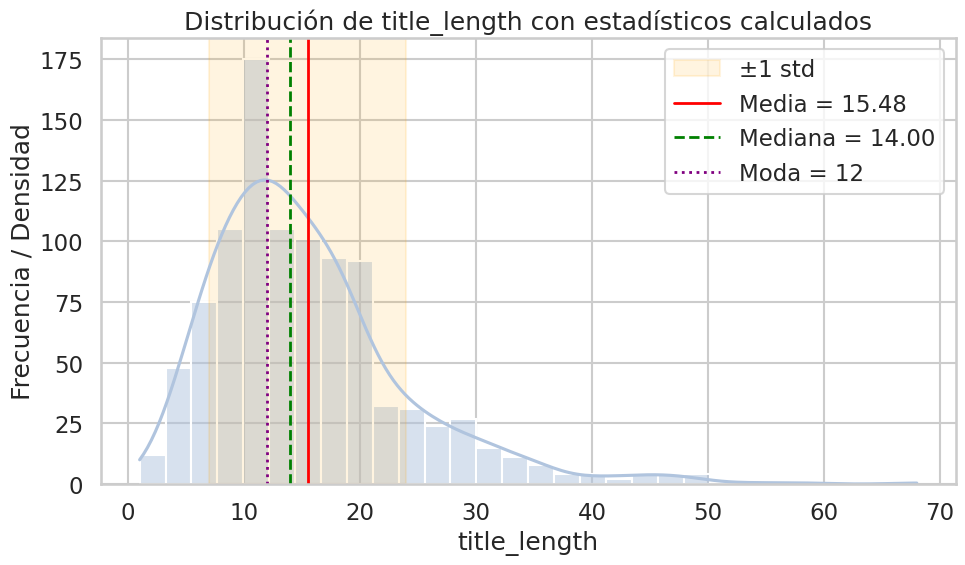

In [44]:


serie = df['title_length']

# Estadísticos
media_val = media
std_val = desviacion_estandar     # ddof=1 para desviación muestral
mediana_val = mediana
moda_val = moda           # devuelve un solo valor


# Gráfico
sns.set(style='whitegrid', context='talk')
fig, ax = plt.subplots(figsize=(10,6))

# Histograma con densidad y líneas. La función la habilitamos con KDE=True
sns.histplot(serie, bins=30, kde=True, color='lightsteelblue', edgecolor='white', ax=ax)

# Banda ±1 std
ax.axvspan(media_val - std_val, media_val + std_val, color='orange', alpha=0.12, label='±1 std')

# Líneas verticales para media, mediana y moda
ax.axvline(media_val, color='red', linestyle='-', linewidth=2, label=f'Media = {media_val:.2f}')
ax.axvline(mediana_val, color='green', linestyle='--', linewidth=2, label=f'Mediana = {mediana_val:.2f}')
ax.axvline(moda_val[0], color='purple', linestyle=':', linewidth=2)

col = 'title_length'

# Etiquetas y leyenda
ax.set_title(f'Distribución de {col} con estadísticos calculados')
ax.set_xlabel(col)
ax.set_ylabel('Frecuencia / Densidad')

# Construir leyenda manual para evitar repetidos
handles, labels = ax.get_legend_handles_labels()
# Añadir etiqueta de moda manualmente
handles.append(plt.Line2D([0],[0], color='purple', linestyle=':', linewidth=2))
labels.append(moda_label)
ax.legend(handles, labels, loc='best', frameon=True)

plt.tight_layout()
plt.show()

En los gráficos se visualiza su sesgo a la izquierda. Observándose igualmente que hay más valores atipicos que en una distribución normal, los cuales inciden en el cálculo de la media. La media y el percentil 50(mediana) también difieren, por lo tanto se corrobora que se trata de una variable sesgada

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [45]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]
lista_valores = np.random.choice(df['title_length'], 5)
#Creando una lista de valores
print(f"Creando una lista:\n{lista_valores.tolist()}")
#Creando un arreglo de valores
print(f"Creando un array:\n{lista_valores}")


Creando una lista:
[21, 7, 26, 14, 4]
Creando un array:
[21  7 26 14  4]


In [49]:
# Calcula la media de los 5 valores
media2 = np.mean(lista_valores)
print(media2)

14.4


In [50]:
# Calcula las diferencias al cuadrado con respecto a la media
diferencias_al_cuadrado = [(x - media2) ** 2 for x in lista_valores]
#Limitar las diferencias a 4 decimales
diferencias_al_cuadrado = np.round(diferencias_al_cuadrado, 4)
print(f"Diferencias al cuadrado:\n{diferencias_al_cuadrado}")

Diferencias al cuadrado:
[ 43.56  54.76 134.56   0.16 108.16]


In [48]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación
varianza = round( (np.sum(diferencias_al_cuadrado)) / (len(lista_valores)-1), 4) # por tratarse de una muestra se resta uno
desviacion_estandar = round( np.sqrt(varianza), 4)
print(f"Varianza: {varianza}\nDesviacion_Estandar: {desviacion_estandar}")


Varianza: 85.3
Desviacion_Estandar: 9.2358
